## Statement : Aanalyzing traffic accident data to identify patterns related to   road  conditions , weather , and the time of day . Visualise accident hotspots and contributing factors.
    

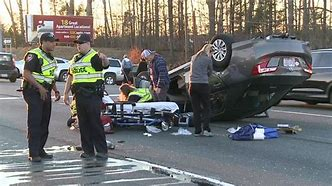

### Dataset link : https://www.kaggle.com/us-accidents/US_Accidents_March23.csv

### Importing Required Libraries 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [7]:
# Find the number of columns that are numeric 
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = data.select_dtypes(numerics)
len(numeric_df.columns)

13

In [8]:
# Find number of missing values in dataset 
missing_percentages = round(data.isnull().sum().sort_values(ascending=True) /len(data) *100,2)

In [9]:
missing_per = missing_percentages[missing_percentages.values > 0]

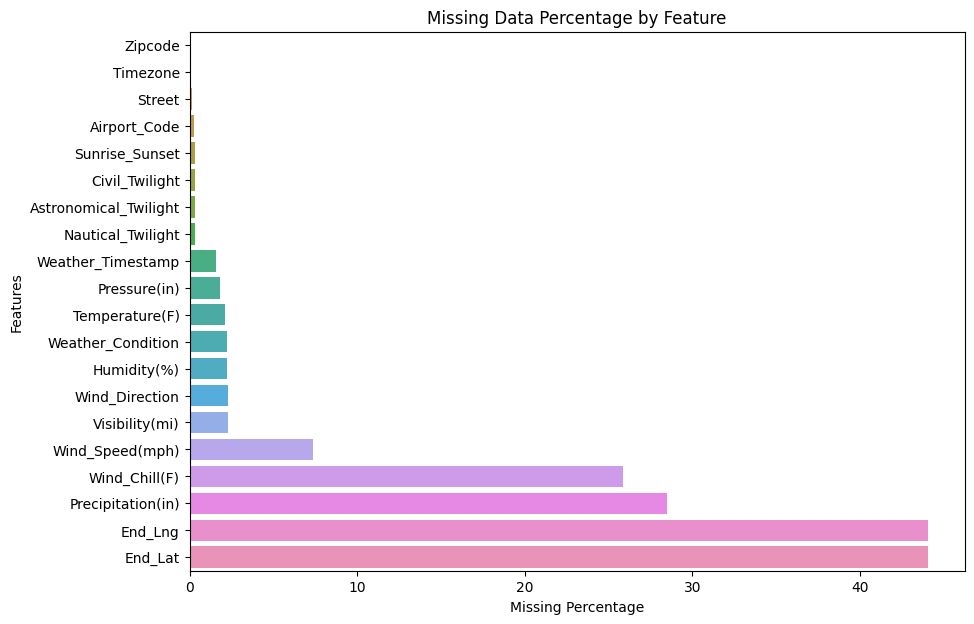

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x=missing_per , y= missing_per.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [11]:
# Analyzing the data by state column
states = data['State'].value_counts().head() # The data indicates california is the highest accident state 


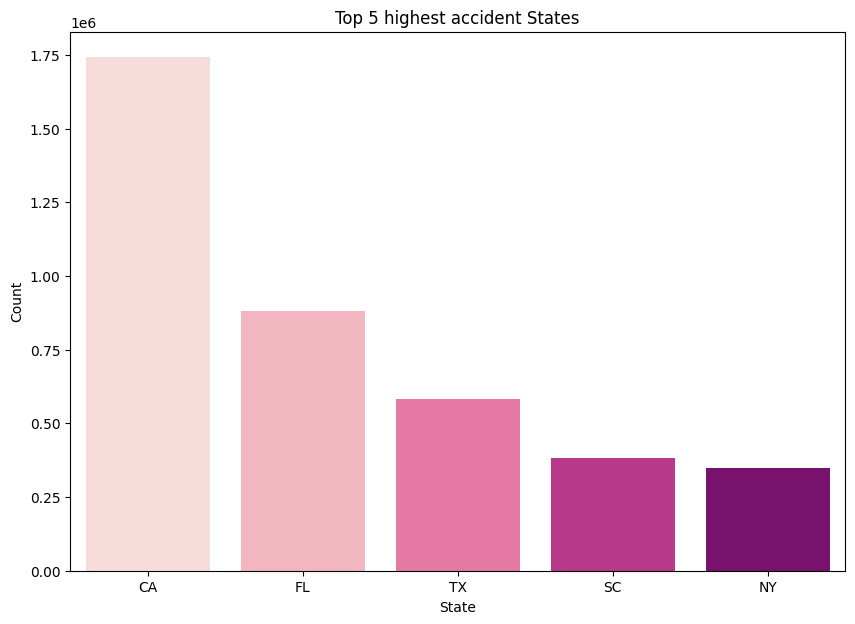

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(y=states , x = states.index, palette="RdPu")
plt.title('Top 5 highest accident States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [13]:
# Analyzing the cities columns 
cities_by_accidents = data['City'].value_counts()
data['City'].nunique()                                  # There are record of 13678 cities 

13678

In [14]:
city = cities_by_accidents.sort_values(ascending=False).head(20)

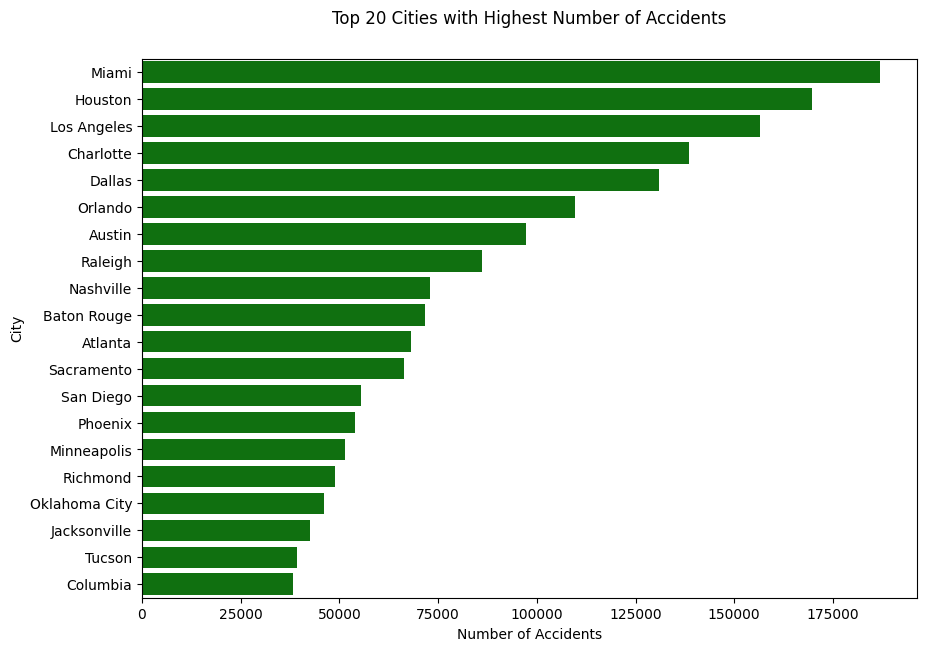

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x=city.values, y=city.index, color='green')

plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.title('Top 20 Cities with Highest Number of Accidents', y=1.05)
plt.show()

In [16]:
sns.set_style('whitegrid')

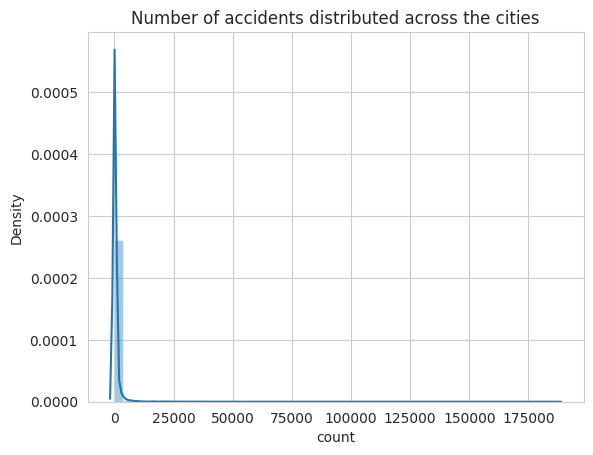

In [17]:
sns.distplot(cities_by_accidents) # Based on the diagram we see that the probability of accident occuring is very less 
plt.title("Number of accidents distributed across the cities")
plt.show()

In [18]:
# Analyzing the start time column 
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

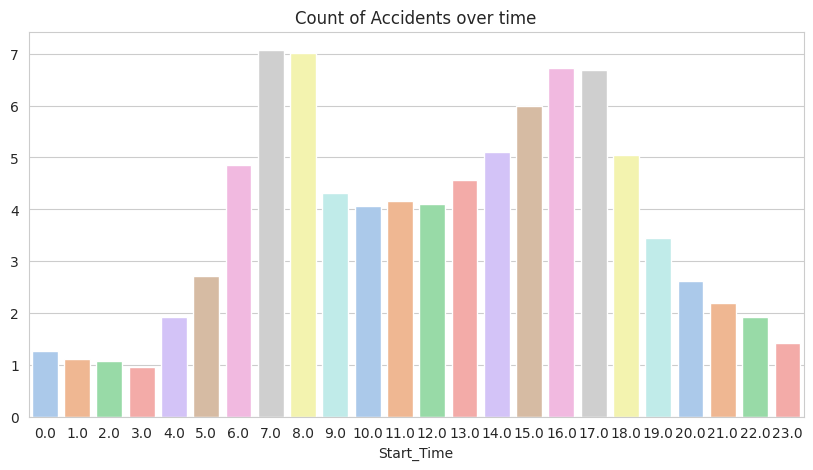

In [19]:
# Accident over time 
plt.figure(figsize=(10,5))
sns.barplot(x = data['Start_Time'].dt.hour.value_counts().index,y = (data['Start_Time'].dt.hour.value_counts().values/len(data))*100, palette='pastel')
plt.title('Count of Accidents over time')
plt.show()

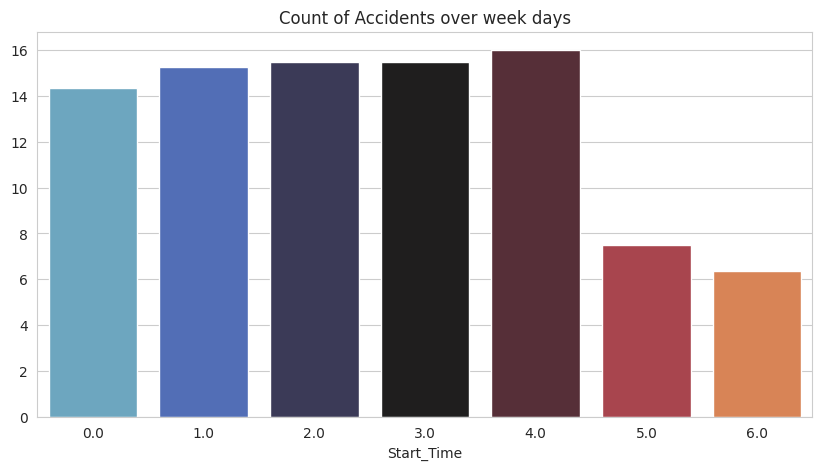

In [20]:
# Accident over day of week 
plt.figure(figsize=(10,5))
sns.barplot(x = data['Start_Time'].dt.day_of_week.value_counts().index,y = (data['Start_Time'].dt.day_of_week.value_counts().values/len(data))*100, palette='icefire')
plt.title('Count of Accidents over week days')
plt.show()

In [21]:
# Analyze the distribution of accidents on saturday and sunday
weekends_data = data[(data['Start_Time'].dt.day_of_week == 5)|(data['Start_Time'].dt.day_of_week == 6)]


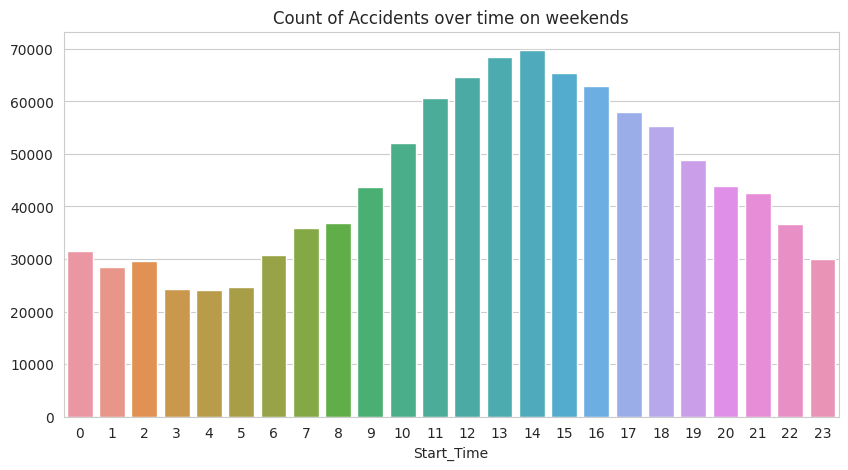

In [22]:
# Plotting the trend on weekends 
weekends_data['Start_Time'].dt.hour.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = weekends_data['Start_Time'].dt.hour.value_counts().index,y = weekends_data['Start_Time'].dt.hour.value_counts().values)
plt.title('Count of Accidents over time on weekends')
plt.show()


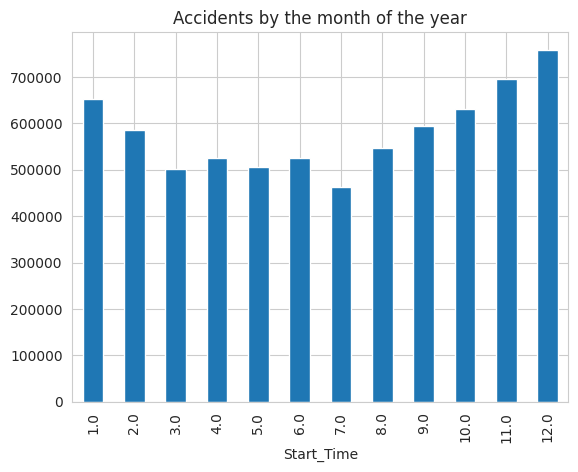

In [26]:
# Analyzing the month which has most accidents
data['Start_Time'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by the month of the year')
plt.show() # We cannot rely heavily on this data as most of it is missing during the first 3 months of 2016 and also for the year 2023

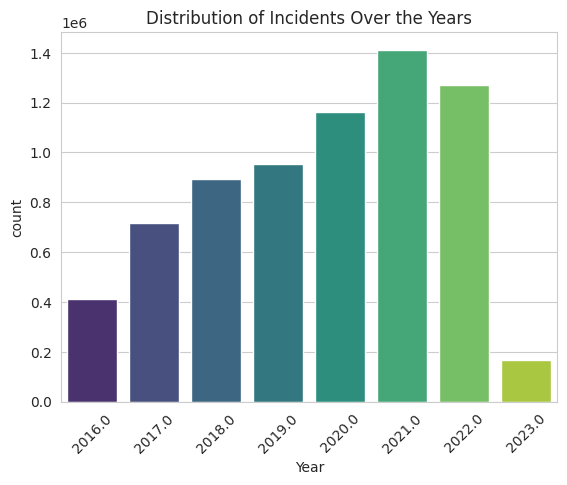

In [23]:
year = data['Start_Time'].dt.year

# Count the occurrences of each year and create a bar plot using Seaborn
sns.countplot(x= year, data=data, palette='viridis')

# Set plot labels and title
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title('Distribution of Incidents Over the Years')

# Display the plot
plt.show()

In [24]:
severity_count = data['Severity'].value_counts()

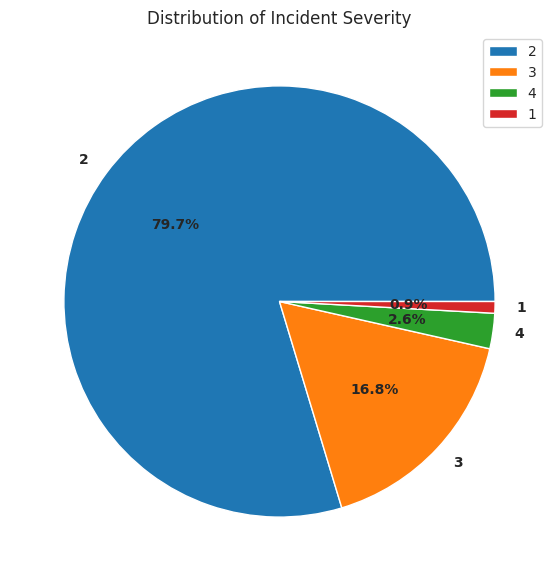

In [25]:
plt.figure(figsize = (10,7))
plt.pie(severity_count, labels=severity_count.index, autopct='%1.1f%%',textprops={'weight':'bold'})
plt.legend()
plt.title('Distribution of Incident Severity')
plt.show()

# **INSIGHTS:**

1. State-wise Analysis:

    California, Florida, Texas, South Carolina, and New York emerge as the top 5 states with the highest number of accidents. 

2. City Breakdown:

    Miami takes the lead with the highest number of accidents among the top 20 cities.
    Columbia holds the distinction of having the lowest number of accidents in this select group. 

3. Peak Hour Findings:

    The time window of 7-8 AM witnesses the majority of accidents, highlighting the importance of heightened awareness during morning rush hours. ⏰

4. Severity 2 and 4 related accident effected the traffic the most ( for severity 2 since the value count is high average distance is on the greater side but as per data severity 4 accident has greatest impact on traffic )

5. The accidents are high from December and  it is lowest at july. The rise continues to increase from the month of July.

6. Accident Counts are higher in the year 2021.